In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [73]:
n_samples=10000
topwidth = 1 #always

height = 1
basewidth = 1.1
epsilon = (basewidth - topwidth)/2

In [74]:
intriangles = np.random.rand(n_samples) <= epsilon / (1 + epsilon)
intriangles.mean()

0.0436

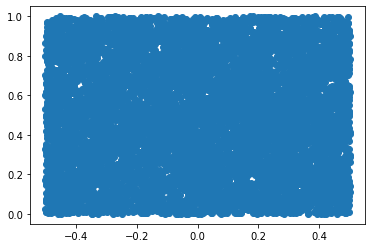

In [75]:
n_triangles_points =  np.count_nonzero(intriangles)
n_rectangle_points = n_samples - n_triangles_points
rectangle_points = np.random.rand(n_rectangle_points, 2)
rectangle_points[:, 0] -= .5
plt.scatter(rectangle_points[:, 0], rectangle_points[:, 1])

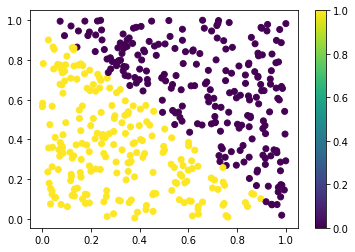

In [76]:
triangles_points = np.random.rand(n_triangles_points, 2)
in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)

plt.colorbar()

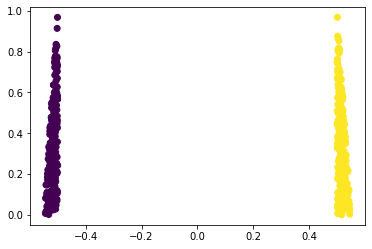

In [77]:
triangles_points = np.random.rand(n_triangles_points, 2)
in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
#plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)

triangles_points[:, 0] *= epsilon
triangles_points[in_first_triangle, 0]+= .5
triangles_points[~in_first_triangle, 1] = 1 - triangles_points[~in_first_triangle][:, 1]
triangles_points[~in_first_triangle, 0] -= epsilon + .5

plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)


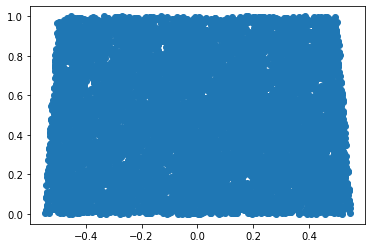

In [78]:
samples = np.empty((n_samples, 2))
samples[intriangles] = triangles_points
samples[~intriangles] = rectangle_points
plt.scatter(samples[:, 0], samples[:, 1])

# results on trapezoid

In [84]:
with open("./trapezoid/results.pkl", "rb") as f:
    results_trap = pkl.load(f)

In [85]:
results_trap

{'data': array([[ 0.24826798,  0.18020271],
        [-0.11097686,  0.03760018],
        [-0.48821226,  0.99626787],
        ...,
        [-0.07776184,  0.58903932],
        [-0.63288522,  0.36100258],
        [-0.48513137,  0.45409677]]),
 'phi': array([[ 1.00000000e+00,  6.87297608e-01, -6.93961034e-01, ...,
          9.66151226e-05,  1.37851264e-04,  7.64379329e-03],
        [ 1.00000000e+00, -3.00172032e-01, -9.93770099e-01, ...,
          8.13331204e-03,  3.52238509e-03, -8.87229742e-03],
        [ 1.00000000e+00, -9.67082727e-01,  1.69369977e+00, ...,
          2.27214056e-02,  5.53786114e-02, -1.48409238e-02],
        ...,
        [ 1.00000000e+00, -1.75771494e-01,  7.24845476e-01, ...,
         -4.96855753e-03, -2.65735442e-03,  1.52811302e-02],
        [ 1.00000000e+00, -1.47696924e+00, -6.80680665e-01, ...,
         -1.28205588e-03,  1.97500080e-03, -3.43073689e-05],
        [ 1.00000000e+00, -1.14564202e+00, -1.21345941e-01, ...,
          3.23143108e-04, -5.18003447e-03, -8.

In [89]:
def get_from_dict(d, values, sep=","):
    return [d[i.strip()] for i in values.split(sep)]

In [90]:
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
    get_from_dict(results_trap, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")



In [93]:
data.shape

(10000, 2)

In [95]:
phi.shape

(10000, 100)

In [96]:
manifolds

[array([ 1,  8, 23, 31, 46, 50, 67]),
 array([ 2,  3,  6,  7, 14, 19, 25, 32, 34, 40, 42, 44, 48, 51, 52, 58, 61,
        69, 71, 79, 85])]

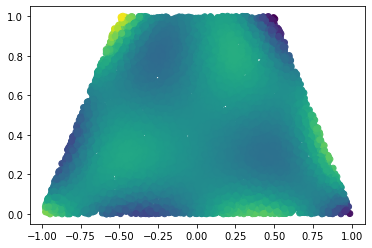

In [122]:
plt.scatter(data[:, 0], data[:, 1], c=phi[:, 16])

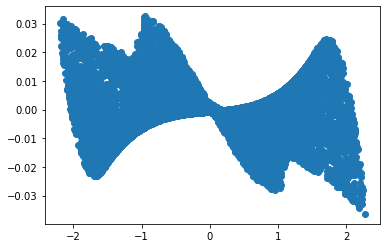

In [99]:
plt.scatter(phi[:, 1], phi[:, 8])

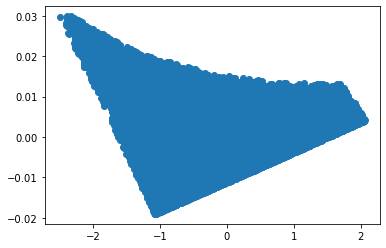

In [123]:
plt.scatter(phi[:, 2], phi[:, 3])